In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)

print('Accuracy of the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('Accuracy of the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

Accuracy of the training subset: 0.904
Accuracy of the test subset: 0.937


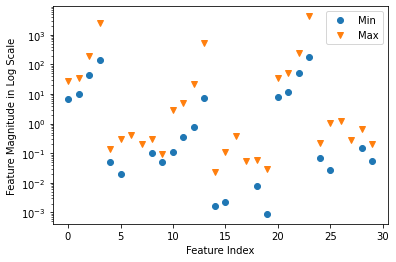

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [42]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)
X_train_scaled = (X_train - min_train)/ range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))


Minimum per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [43]:
X_test_scaled = (X_test - min_train)/range_train

svm = SVC()
svm.fit(X_train_scaled, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
print('Accuracy of the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('Accuracy of the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

Accuracy of the training subset: 0.984
Accuracy of the test subset: 0.972


In [45]:
svm = SVC(C=10)
svm.fit(X_train_scaled, y_train)

print('Accuracy of the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('Accuracy of the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

Accuracy of the training subset: 0.988
Accuracy of the test subset: 0.972


# Advantages and Disadvanatages of SVM

## Stronger points:

#### 1. they  are versatile.
#### 2. can build complex decision boundaries on the low-dimentional data
#### 3. can work well on high-dimentional data with relatively small sample size etc.

## Weaker points:

#### 1. dont perform well on high-dimentional data with many samples(i..e. > 1000)
#### 2. preprocessig may be required => implies knowledge and unerstanding of hyperparameters
#### 3. harder to inspect and visualize etc

## Alternatives:

#### 1. DT and Random Forests (require less/no preeprocessing of data, easier to understand , inspect, and visualize)

## Good Practices:

#### 1. data scaling
#### 2. other pre-processing
#### 3. choosing an appropiate kernel
#### 4. tuning hyper-parameters ; C;  gamma, etc.

##                                             Uncertainity Estimation

## decision function & predict probability

In [48]:
print('The decision function is\n\n {}'.format(svm.decision_function(X_test_scaled)[:20]))

The decision function is

 [-2.68882319  0.99574842  2.11204632  1.29398482  1.83701612  2.41498141
  2.86687098  1.91828312  1.32018282  2.24420887  0.67744413  1.11285184
  2.69579553  0.11331079  0.83823022 -1.41340138  1.46344694 -3.34120146
 -2.93379336 -2.83892202]


In [51]:
print('Thresholded decision functon\n\n{}'.format(svm.decision_function(X_test_scaled)[:20] > 0))

Thresholded decision functon

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False False False]


In [54]:
svm.classes_

array([0, 1])

In [60]:
svm = SVC(C=1000, probability=True)
svm.fit(X_train_scaled, y_train)

print('Predicting prpobailities for the samples (maligant & benign):\n\n{}'.format(svm.predict_proba(X_test_scaled[:20])))

Predicting prpobailities for the samples (maligant & benign):

[[9.97792493e-01 2.20750674e-03]
 [3.37815266e-01 6.62184734e-01]
 [9.95239555e-06 9.99990048e-01]
 [6.67793429e-02 9.33220657e-01]
 [2.06677439e-02 9.79332256e-01]
 [1.51512649e-05 9.99984849e-01]
 [1.60400733e-08 9.99999984e-01]
 [1.97897058e-02 9.80210294e-01]
 [9.77893199e-03 9.90221068e-01]
 [3.28136277e-07 9.99999672e-01]
 [4.79005111e-01 5.20994889e-01]
 [9.22510321e-02 9.07748968e-01]
 [1.15534780e-06 9.99998845e-01]
 [5.74002518e-02 9.42599748e-01]
 [7.67504141e-01 2.32495859e-01]
 [9.96159441e-01 3.84055877e-03]
 [4.97689653e-03 9.95023103e-01]
 [9.96906464e-01 3.09353637e-03]
 [9.97019803e-01 2.98019738e-03]
 [9.99315428e-01 6.84571575e-04]]
